In [37]:
import traintools
import matplotlib.pyplot as plt
import networkx as nx
from trainconstants import *

df = traintools.read_schedule("datasets/nsdata1.txt")
test_train_type = TYPE_3_TRAIN

lowerbound = traintools.minimum_number_of_trains_at_time_t(df, test_train_type).max()[0]

G = traintools.graph_from_schedule(df, test_train_type)
all_trains, number_of_trains, starting_trains, ending_trains, G = traintools.attempt_solution_correct_endpoints(G.copy())

print({station: len(trains) for station, trains in starting_trains.items()}, {station: len(trains) for station, trains in ending_trains.items()})
print('Endpoints match!'*({station: len(trains) for station, trains in starting_trains.items()} == {station: len(trains) for station, trains in ending_trains.items()}))
print('using:', number_of_trains)

df_ = nx.to_pandas_edgelist(G.copy())
df_['over_scheduled'] = df_['trains_scheduled'] - df_['trains_needed']
G_ = nx.from_pandas_edgelist(
        df=df_, 
        source='source', 
        target='target', 
        edge_attr=['over_scheduled'], 
        create_using=nx.DiGraph
        )
all_trains2, number_of_trains2, starting_trains2, ending_trains2, G2 = traintools.find_over_scheduled(G_.copy())

print(number_of_trains2, 'train(s) can be subtracted')
print(f'Total number of trains scheduled: {number_of_trains - number_of_trains2}')
print(f'Lowerbound: {lowerbound}')
if lowerbound == number_of_trains - number_of_trains2:
    print('Optimal solution found!')

{3: 5, 2: 7, 1: 3, 4: 10} {3: 5, 2: 7, 1: 3, 4: 10}
Endpoints match!
using: 25
3 train(s) can be subtracted
Total number of trains scheduled: 22
Lowerbound: 22.0
Optimal solution found!


c:\Users\20212751\OneDrive - TU Eindhoven\Desktop\train modeling\traintools.py:554: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(range(300, 1500, 100))


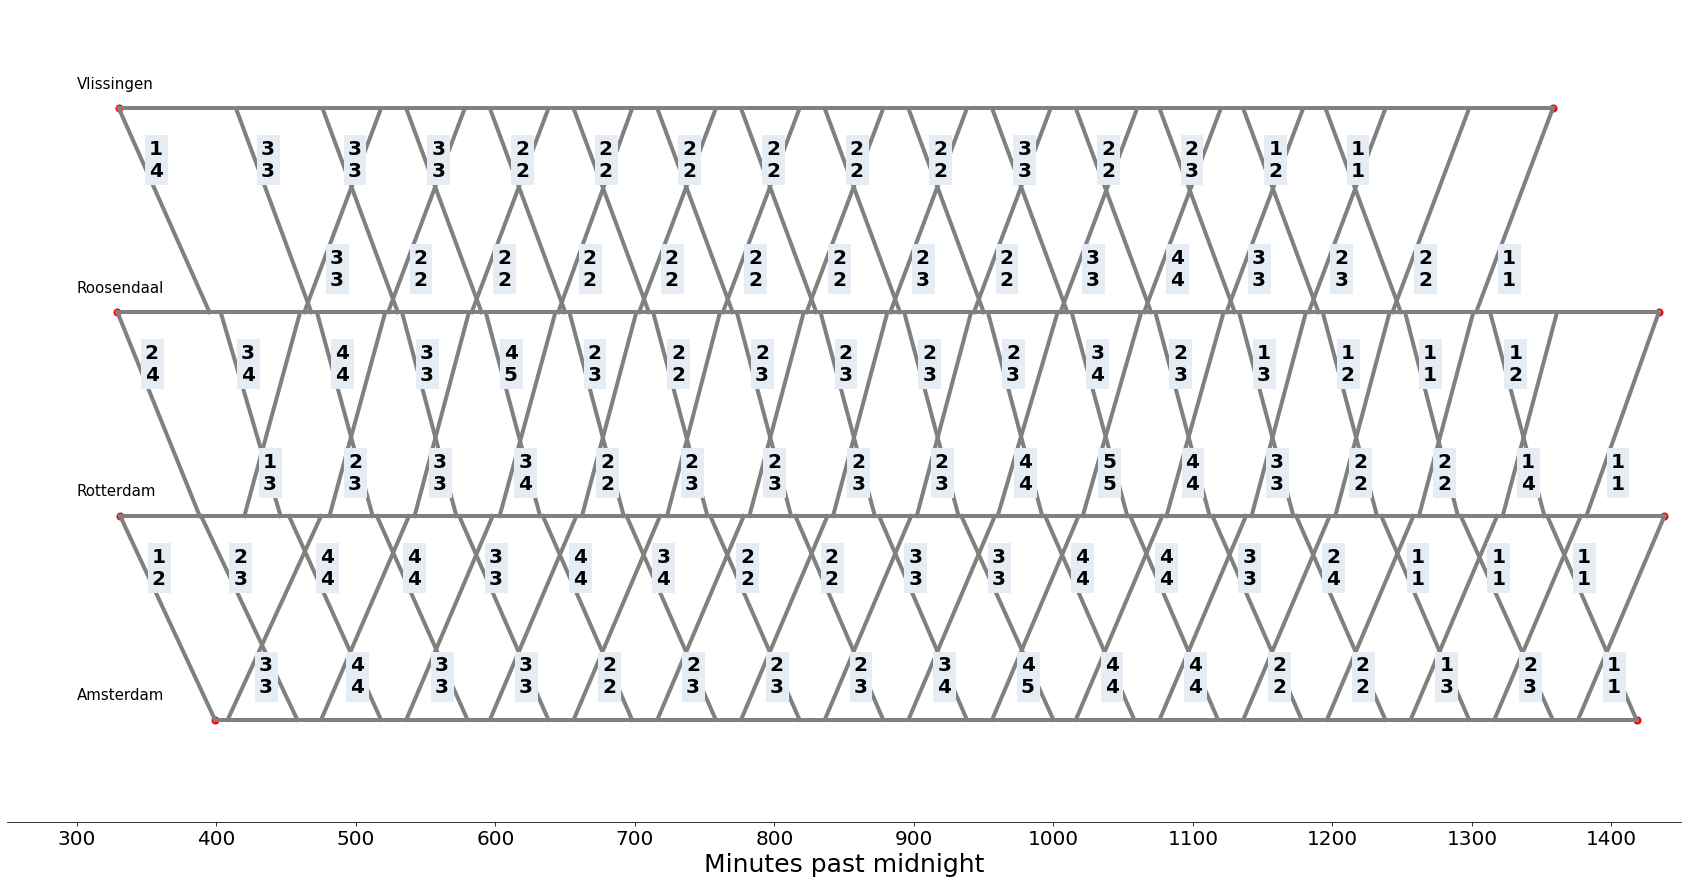

In [38]:

for path in all_trains2:
     for index, current_stop in enumerate(path[:-1]):
            next_stop = path[index + 1]
            G[current_stop][next_stop]['trains_scheduled'] -= 1
traintools.highlight_paths([], G, compare=True)
plt.savefig('images/result.pdf', bbox_inches='tight')

c:\Users\20212751\OneDrive - TU Eindhoven\Desktop\train modeling\traintools.py:554: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(range(300, 1500, 100))


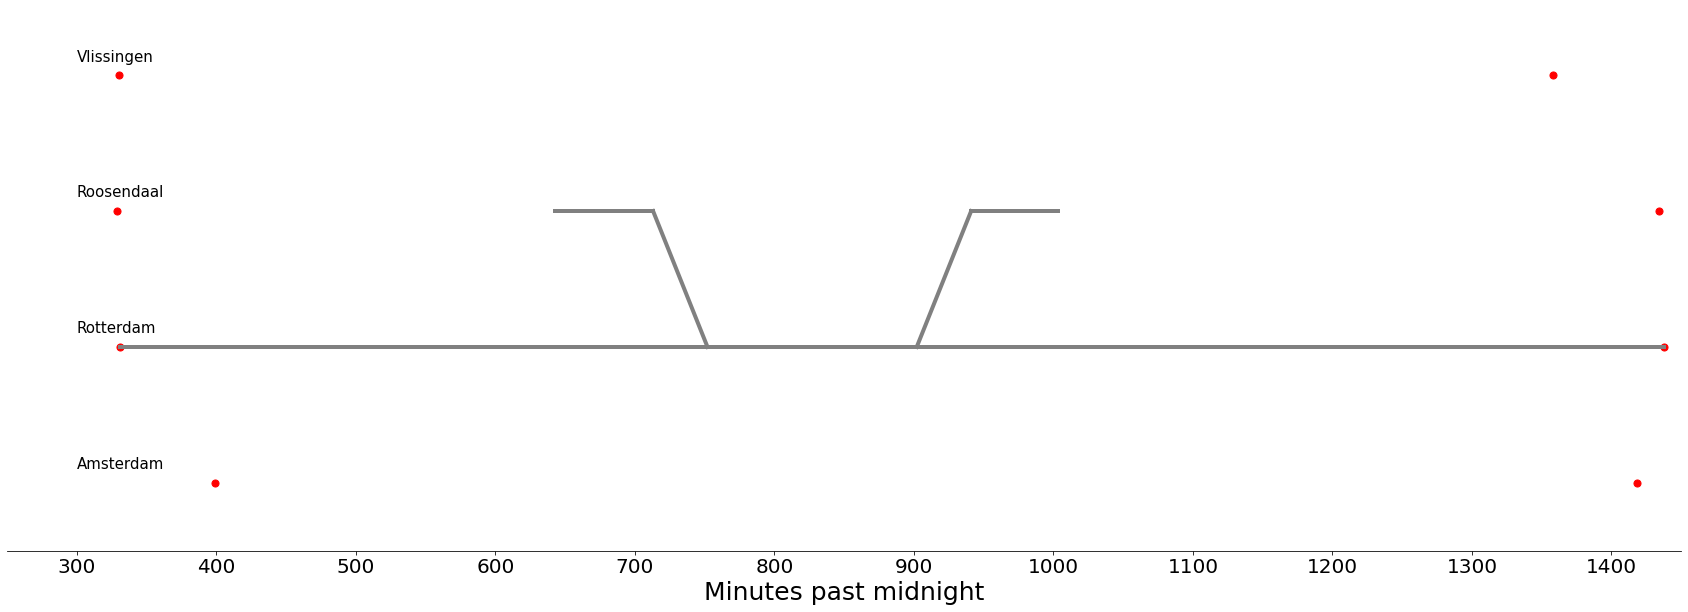

In [39]:
G = traintools.graph_from_schedule(df, test_train_type)
to_keep = [(a,b) for a, b, attrs in G.edges(data=True) if (a[0] == b[0] == 2)] 
to_keep += [(a,b) for a, b, attrs in G.edges(data=True) if (a[0] == b[0] == 3) and ((600 <= a[1] <= 710) or (900 <= a[1] <= 1000))] 
to_keep += [(a,b) for a, b, attrs in G.edges(data=True) if (a[0] == 3) and (b[0] == 2) and (700 <= a[1] <= 750)] 
to_keep += [(a,b) for a, b, attrs in G.edges(data=True) if (a[0] == 2) and (b[0] == 3) and (850 <= a[1] <= 950)] 

to_remove = [(a,b) for a, b, attrs in G.edges(data=True) if (a, b) not in to_keep]

G.remove_edges_from(to_remove)
traintools.highlight_paths([], G)
plt.savefig('images/rerouting_con.pdf', bbox_inches='tight')

c:\Users\20212751\OneDrive - TU Eindhoven\Desktop\train modeling\traintools.py:554: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(range(300, 1500, 100))


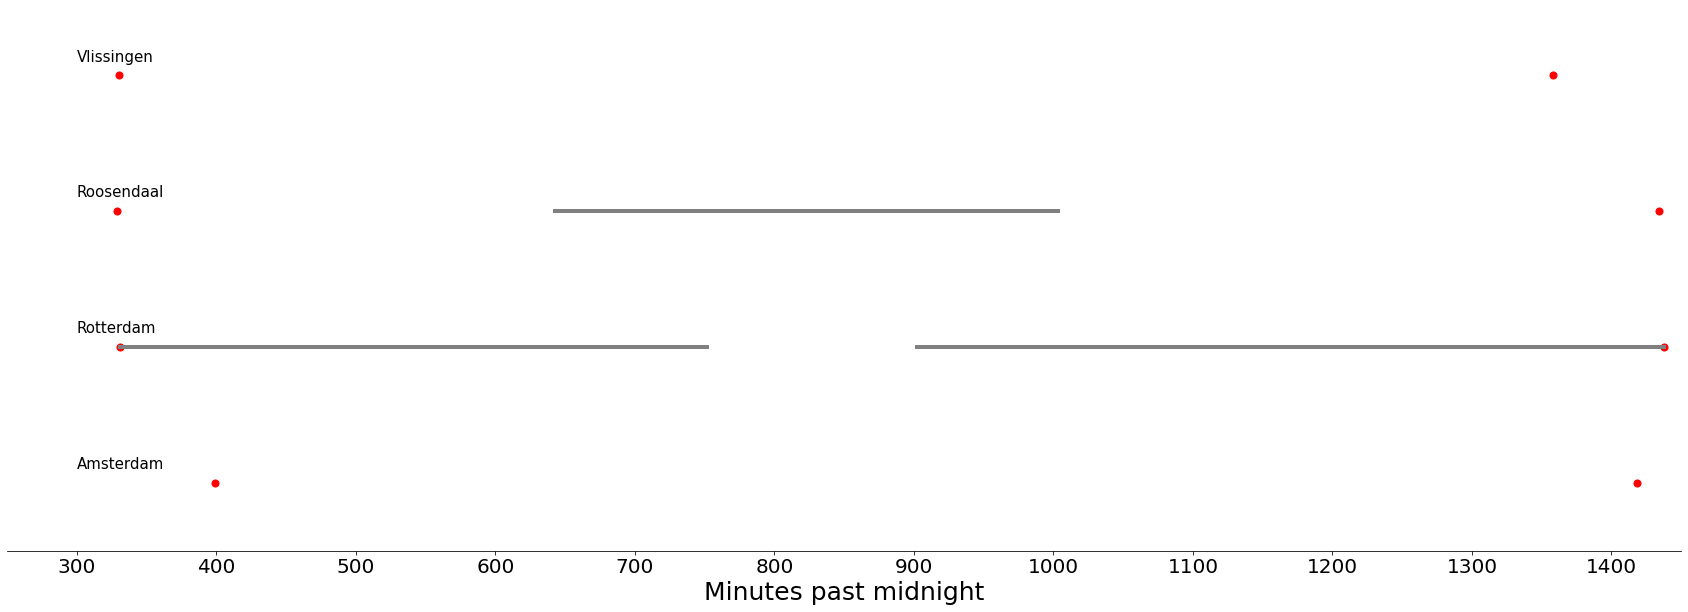

In [40]:
G = traintools.graph_from_schedule(df, test_train_type)
to_keep = [(a,b) for a, b, attrs in G.edges(data=True) if (a[0] == b[0] == 2) and not (750 <= a[1] <= 900 )] 
to_keep += [(a,b) for a, b, attrs in G.edges(data=True) if (a[0] == b[0] == 3) and (600 <= a[1] <= 1000)] 
 

to_remove = [(a,b) for a, b, attrs in G.edges(data=True) if (a, b) not in to_keep]

G.remove_edges_from(to_remove)
traintools.highlight_paths([], G)
plt.savefig('images/rerouting_sep.pdf', bbox_inches='tight')

c:\Users\20212751\OneDrive - TU Eindhoven\Desktop\train modeling\traintools.py:554: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(range(300, 1500, 100))


12


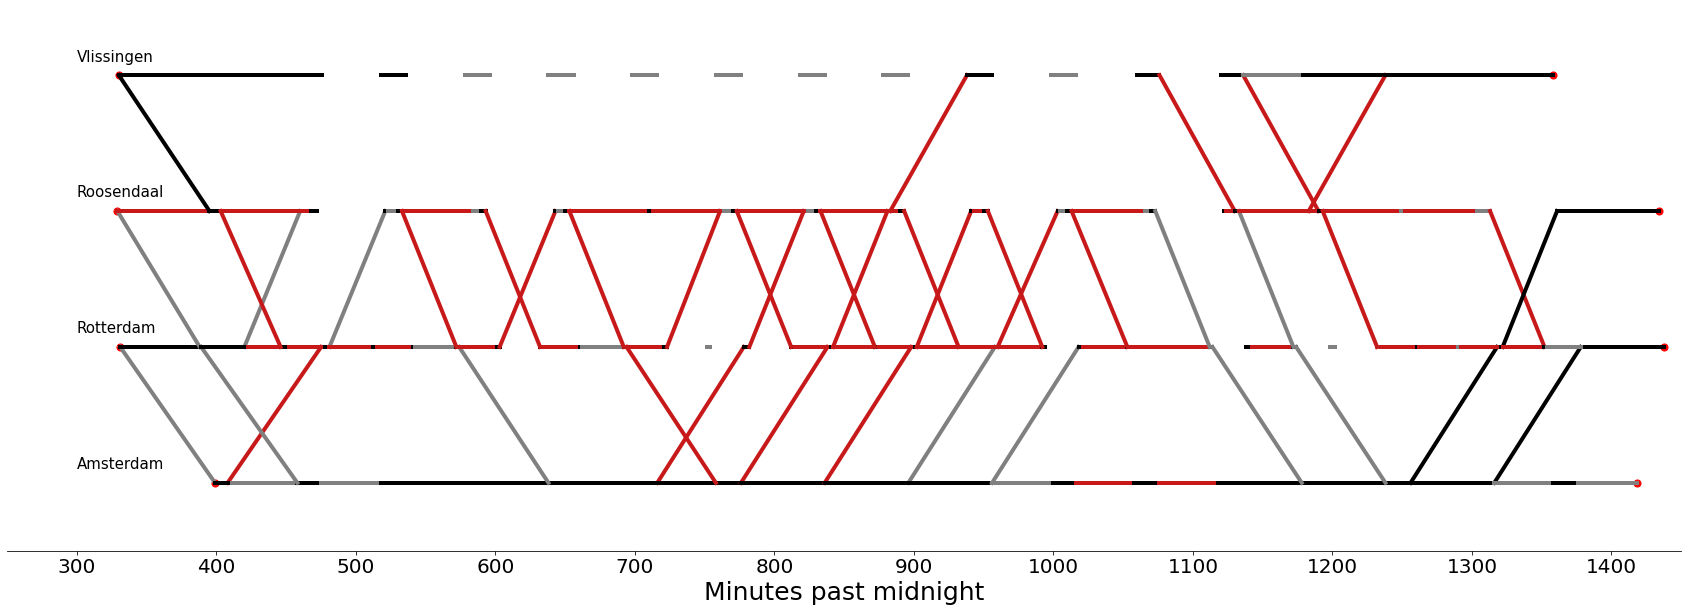

In [41]:
to_remove = [(a,b) for a, b, attrs in G_.edges(data=True) if attrs['over_scheduled'] <= 0]
G_.remove_edges_from(to_remove)
traintools.highlight_paths([], G_, color_code=True)
print(nx.to_pandas_edgelist(G_.copy())['over_scheduled'].max())
plt.savefig('images/overscheduled.pdf', bbox_inches='tight')

c:\Users\20212751\OneDrive - TU Eindhoven\Desktop\train modeling\traintools.py:554: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(range(300, 1500, 100))


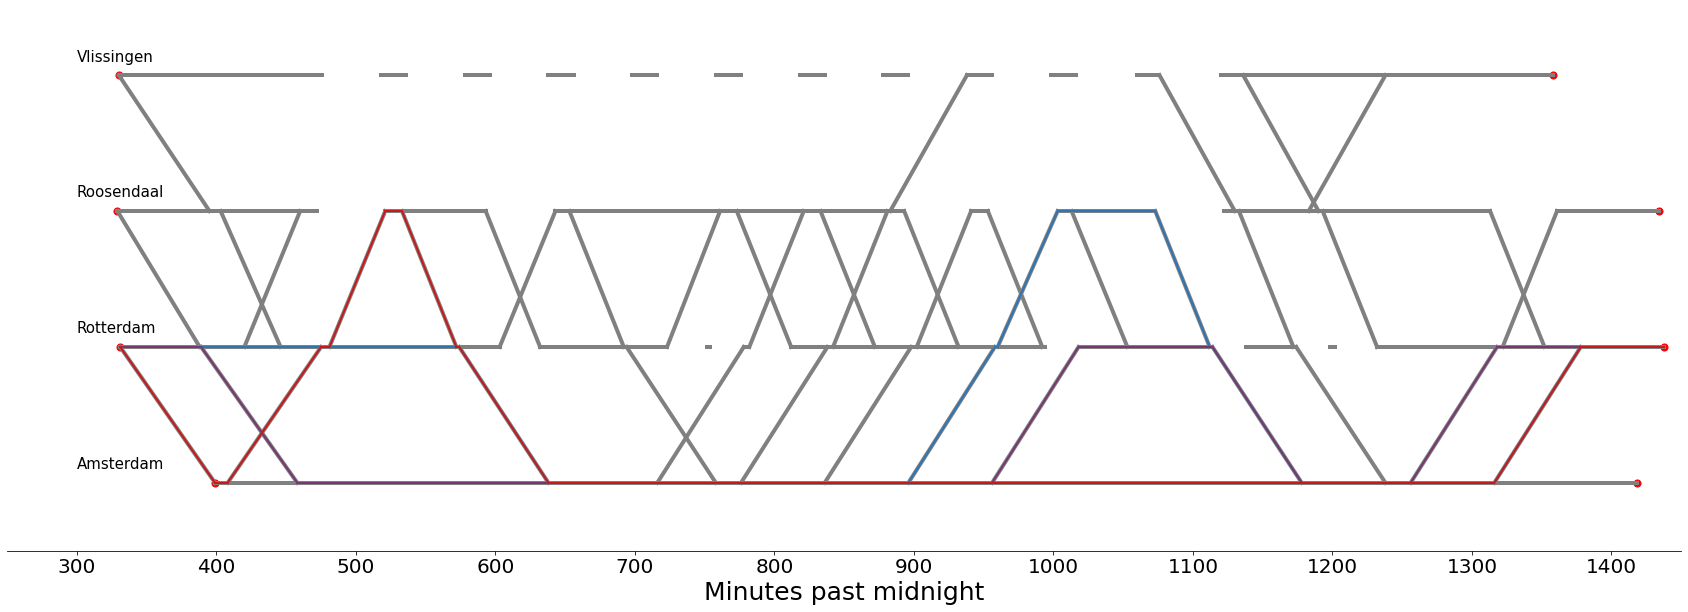

In [42]:
traintools.highlight_paths(all_trains2, G_)
plt.savefig('images/overscheduled_highlighted_paths.pdf', bbox_inches='tight')